# **Prediksi Hepatitis C**

## **Exploratory Data Analysis**

Disini kita akan melihat pengaruh antar tiap kolom dengan satu sama lain. Begitu juga dengan distribusi data, hipotesis, dan sebaran data.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [ ]:
df = pd.read_csv('cleaned_Data.csv')

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,0,32.0,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,0,32.0,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,2,0,32.0,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,0,32.0,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,4,0,32.0,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,610,4,62.0,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
608,611,4,64.0,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
609,612,4,64.0,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
610,613,4,46.0,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

## **Statistika Deskriptif**

Disini kita lihat standar deviasi, min, median, rata-rata, serta kuartil dan nilai maksimum tiap kolom.

In [ ]:
numerik = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT', 'Age']
df[numerik].describe()

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Age
count,612.000000,612.00000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,41.650000,68.24902,28.377124,34.629902,11.004902,8.206487,5.366176,81.258333,39.295752,72.047549,47.397059
std,5.721926,25.70445,25.470818,33.010979,17.100164,2.193388,1.125956,49.858320,54.575007,5.391748,10.047230
min,14.900000,11.30000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,19.000000
25%,38.800000,52.90000,16.400000,21.600000,5.275000,6.937500,4.617500,67.000000,15.700000,69.300000,39.000000
50%,41.950000,66.20000,22.950000,25.850000,7.300000,8.265000,5.300000,76.850000,23.300000,72.200000,47.000000
75%,45.225000,79.37500,32.925000,32.825000,11.200000,9.600000,6.060000,88.000000,40.125000,75.400000,54.000000
max,82.200000,416.60000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,77.000000


Dari sini bisa kita simpulkan bahwa **rata-rata pasien memiliki umur sekitar 47 tahun**, ini karena mean dan median tidak terlalu jauh.

**Hampir semua kolom tidak memiliki jarak yang terlalu jauh antara mean dan median**, terkecuali ALT, AST, CREA, dan GGT.

Nilai standar deviasi banyak kolom juga besar, jika dibandingkan dengan nilai meannya. Ini berarti **hampir semua kolom kecuali ALB, PROT, dan Age memiliki sebaran yang luas.**

## **Normalitas & Distribusi**

Pertama, mari kita lihat bagaimana tiap data terdistribusi.

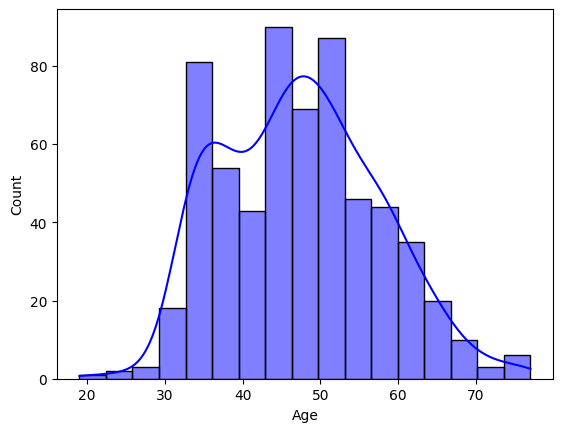

In [ ]:
sns.histplot(df['Age'], color='blue', kde = True)
plt.show()

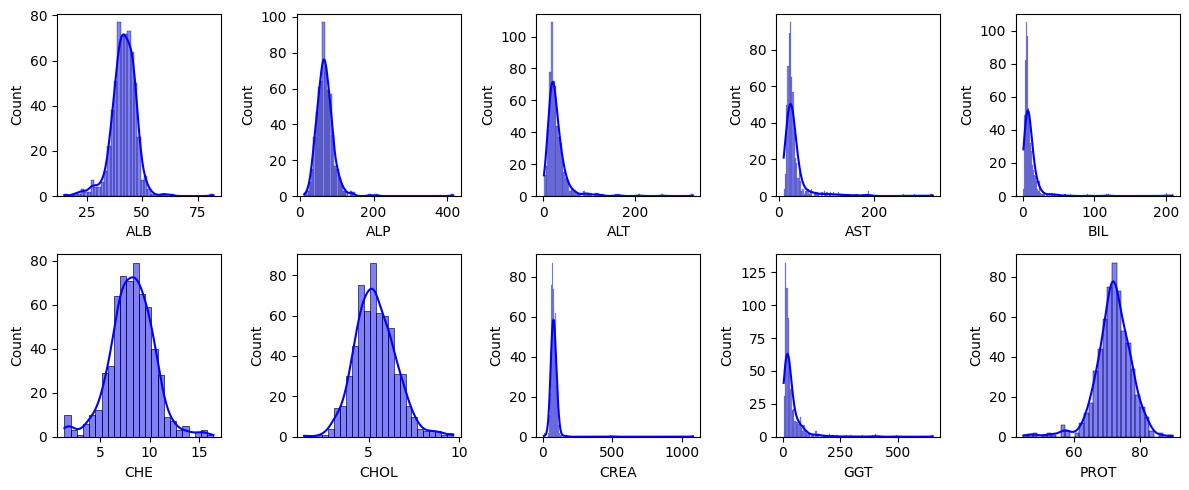

In [ ]:
numerik.remove('Age')

plt.figure(figsize=(12, 5))
for i in range(0, len(numerik)):
    plt.subplot(2, int(len(numerik)/2), i+1)
    sns.histplot(df[numerik[i]], color='blue', kde = True)
    plt.tight_layout()

Untuk umur, distribusinya memiliki 2 puncak yang berbeda. ini menunjukkan bahwa dalam data, **persentase pasien dengan umur 30 - 50 cukup besar.**

Bisa kita lihat, **untuk banyak dari nilai laboratorium, distribusinya skewed ke kanan**. Ini menunjukkan bahwa sebagian besar nilai yang ada berada di kiri, yang merupakan ekspektasi kita saat menguji orang-orang dengan asumsi mereka sehat.

Kedua, kita akan cek normalitas. Akan digunakan uji kolmogorov-smirnov, mengingat sampel data lebih banyak dari 50.

In [ ]:
numerik.append('Age')
uji_Normalitas = pd.DataFrame(index = ['Statistical Value', 'p-value'],
                              columns = numerik)
for i in numerik:
  a, b = sp.kstest((df[i]-np.mean(df[i]))/np.std(df[i], ddof=1), 'norm')
  uji_Normalitas.loc["Statistical Value",i] = a
  uji_Normalitas.loc["p-value",i] = b

In [ ]:
uji_Normalitas

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Age
Statistical Value,0.069149,0.093845,0.18658,0.293478,0.296775,0.04069,0.042772,0.270163,0.272101,0.072328,0.060474
p-value,0.005463,0.000038,0.0,0.0,0.0,0.255982,0.206846,0.0,0.0,0.003141,0.021806


Dari sini bisa kita simpulkan, **kolom yang berdistribusi normal hanyalah kolom CHE dan CHOL.**

## **Outliers**

Mari kita cek bagaimana data tersebar untuk melihat apakah ada outlier, dan apakah outlier-outlier tersebut ekstrem.

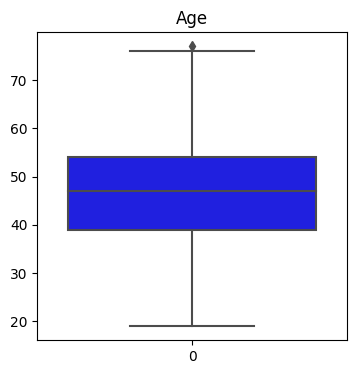

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(df['Age'], color='blue')
plt.title('Age')
plt.show()

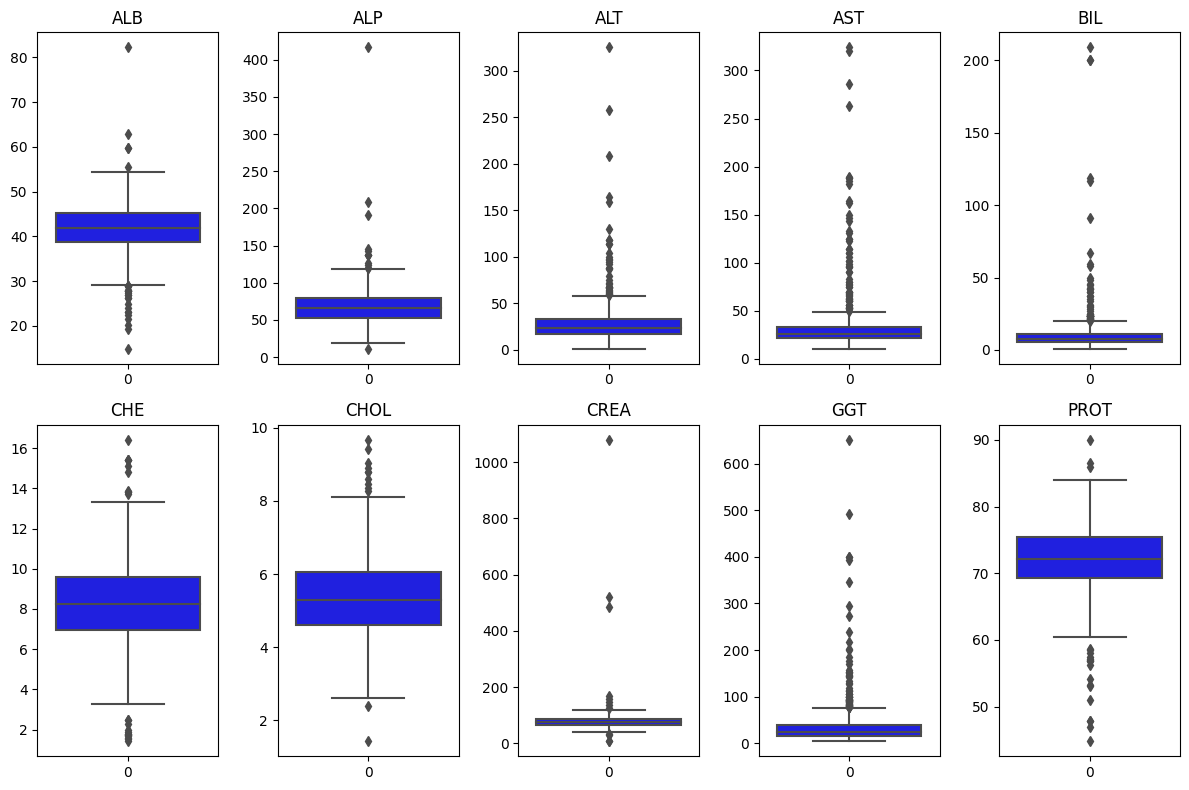

In [ ]:
#numerik.remove('Age')
plt.figure(figsize=(12, 8))
for i in range(0, len(numerik)):
    plt.subplot(2, int(len(numerik)/2), i+1)
    sns.boxplot(df[numerik[i]], color='blue')
    plt.title(numerik[i])
    plt.tight_layout()

Disini, bisa kita ambil beberapa kesimpulan.
- **Kolom Age memiliki outlier, tetapi tidak ekstrem**
- **Semua Kolom nilai Laboratorium memiliki Outlier**

## **Proporsi**

Disini, kita akan melihat bagaimana proporsi kategori para pasien.

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32.0,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32.0,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32.0,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32.0,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32.0,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4,62.0,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
608,4,64.0,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
609,4,64.0,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
610,4,46.0,0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


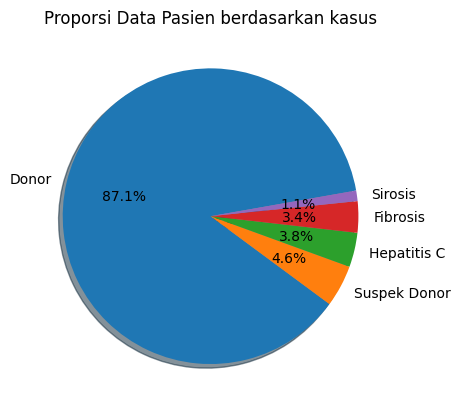

In [ ]:
proporsi = list(df['Category'].value_counts(normalize = True))
labels = ['Donor', 'Suspek Donor', 'Hepatitis C', 'Fibrosis',
          'Sirosis']

plt.pie(proporsi, labels= labels, startangle=10,
shadow=True, explode = (0,0,0,0,0), autopct = '%1.1f%%')

plt.title("Proporsi Data Pasien berdasarkan kasus")
plt.show()

Kita bisa simpulkan bahwa kebanyakan data yang kita miliki merupakan data donor darah. Dan bahwa, **91.7% data yang kita miliki merupakan dari pasien yang merupakan atau mungkin merupakan seorang Donor Darah.**

In [ ]:
df['Sex'].value_counts(normalize = True)

1    0.611111
0    0.388889
Name: Sex, dtype: float64

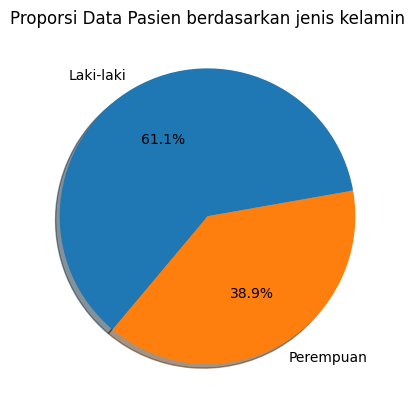

In [ ]:
proporsi = list(df['Sex'].value_counts(normalize = True))
labels = ['Laki-laki', 'Perempuan']

plt.pie(proporsi, labels= labels, startangle=10,
shadow=True, explode = (0,0), autopct = '%1.1f%%')

plt.title("Proporsi Data Pasien berdasarkan jenis kelamin")
plt.show()

Dari sini, bisa kita simpulkan bahwa **lebih dari 60% pasien merupakan lelaki**, sedangkan dibawah 40% adalah perempuan.

In [ ]:
df.groupby(by=['Sex'])['Category'].value_counts(normalize = True)

Sex  Category
0    0           0.903361
     4           0.042017
     3           0.033613
     2           0.016807
     1           0.004202
1    0           0.850267
     2           0.050802
     4           0.048128
     3           0.034759
     1           0.016043
Name: Category, dtype: float64

Disini, bisa kita lihat bahwa pada pria, **tingkat hepatitis C jauh lebih tinggi**, sekitar 5% dibandingkan dengan 1% pada perempuan.

## **Korelasi dan Multikolinearitas**

Sekarang, akan kita lihat kolom mana sajakah yang berkorelasi tinggi, dan ada atau tidakkah multikolinearitas dalam data kita.

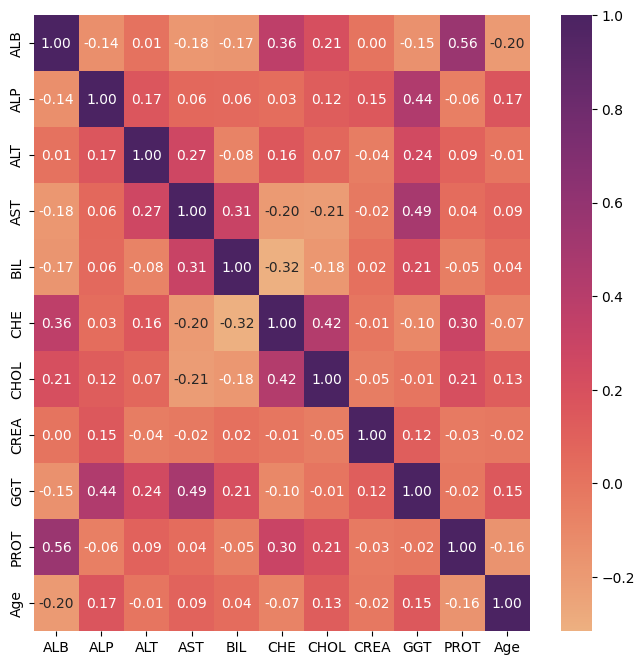

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df[numerik].corr(method = 'pearson'), cmap = 'flare', annot = True,
            fmt = ".2f")
plt.show()

Disini tidak ada koefisien korelasi yang lebih besar dari 0.8, sehingga bisa kita katakan **tidak ada multikolinearitas, sehingga Dimensionality Reduction tidaklah diperlukan.**

- **ALB Berkorelasi sedang dengan PROT** dan lemah dengan dengan semua fitur numerik lainnya
- **ALP Berkorelasi sedang dengan CGT** dan lemah dengan semua fitur numerik lainnya
- ALT Berkorelasi lemah dengan semua fitur numerik lainnya
- **AST Berkorelasi sedang dengan CGT** dan lemah dengan semua fitur numerik lainnya
- BIL Berkorelasi lemah dengena semua fitur numerik lainnya
- **CHE Berkorelasi sedang dengan CHOL** dan lemah dengan semua fitur numerik lainnya
- **Tidak ada nilai laboratorium yang berkorelasi kuat dengan umur.**

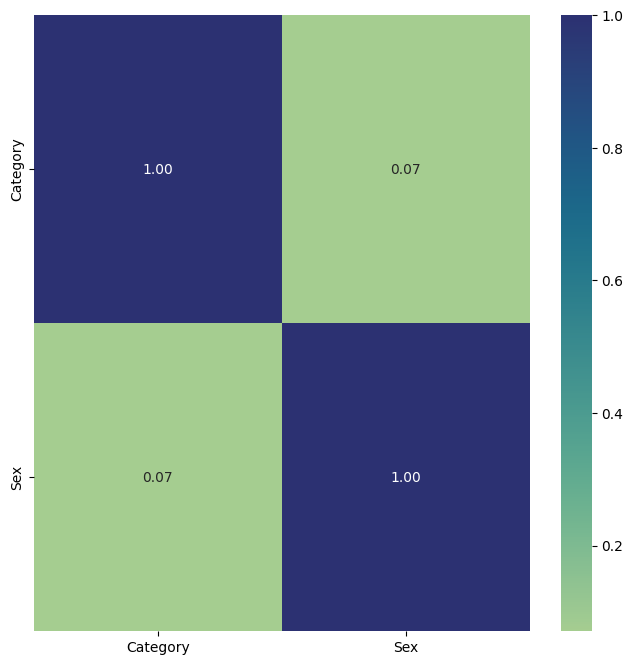

In [ ]:
categorical = ['Category', 'Sex']

plt.figure(figsize = (8,8))
sns.heatmap(df[categorical].corr(method = 'kendall'), cmap = 'crest', annot = True,
            fmt = ".2f")
plt.show()

Bisa kita lihat bahwa **Hampir Tidak ada Korelasi Kategorikal antara Jenis Kelamin dan Kategori Pasien.**

## **EDA Conclusion**

- Rata-rata pasien memiliki umur sekitar 47 tahun.

- Persentase pasien dengan umur 30 - 50 cukup besar.

- Kolom yang berdistribusi normal hanyalah kolom CHE dan CHOL.

- Hampir semua kolom tidak memiliki jarak yang terlalu jauh antara mean dan median, terkecuali ALT, AST, CREA, dan GGT.

- Hampir semua kolom kecuali ALB, PROT, dan Age tersebar dengan luas.

- Hampir Tidak ada Korelasi Kategorikal antara Jenis Kelamin dan Kategori Pasien.

- Tidak ada nilai laboratorium yang berkorelasi kuat dengan umur.

- 91.7% data yang ada adalah pasien yang merupakan atau mungkin merupakan seorang Donor Darah.

- Lebih dari 60% pasien dalam data merupakan lelaki.

- pada pria, Tingkat Hepatitis C jauh lebih tinggi dalam bentuk persentase.

- Semua Kolom nilai Laboratorium memiliki Outlier.